In [22]:
file=r'C:\Users\20143\Desktop\数据\top1000.txt'
import pandas as pd
#df=pd.read_csv(r'D:\程序\word2vec\test_18.model.txt',sep=' ',header=None,engine='python')

# coding=utf-8
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
 names = ['ID','area','comment','confidence','lat','lng','name','negative','positive','repost','sentiment','thumb','time','uid_0','uid_1','userarea','Shape_Leng','area_code','count','txt'
]

In [22]:
import pandas as pd
df=pd.read_csv(r'C:\Users\20143\Desktop\小程序代码\wuhan去重处理后最终.csv',sep=',',engine='python', header=None, names=names,encoding='utf-8')

In [23]:
df=df.drop(index=[0])
#删除莫名其妙的第一行

In [30]:
def panduan2(str_):
    if '·' in str_:
        return 1
    else:
        return 0
df['code'] = df.apply(lambda x: panduan2(x['area']), axis=1)
ss=df[df['code']==1]

In [32]:
ss.to_csv(r'C:\Users\20143\Desktop\小程序代码\result.csv')

In [35]:
len(set(ss['area'].values.tolist()))

1107

In [33]:
tf=ss['positive'].groupby(ss['area']).mean()

In [34]:
tf.head()

area
 2武汉·琴台音乐厅     0.978664
武汉 2武汉·沿江一号    0.000690
武汉·5.5创意产业园    0.839731
武汉·DRAC东风雷诺    0.858553
武汉·FREE阁调      0.145794
Name: positive, dtype: float64

In [60]:
data = {'area':ss['area'].value_counts().to_frame().index[:].tolist(),
       'count':ss['area'].value_counts().to_frame()['area'].tolist()}
area_count= pd.DataFrame(data)

In [79]:
ss[['area','lat','lng']].drop_duplicates(['area'])

,area,lat,lng
1,武汉·阳光在线,30.499079,114.398732
2,武汉·武汉市第一医院,30.574591,114.266610
3,武汉·杨家湾,30.507968,114.373318
4,武汉·万科汉口传奇唐樾,30.622229,114.258161
5,武汉·宏基汽车客运站,30.535892,114.312091
...,...,...,...
5144,武汉·东湖·春树里,30.577266,114.357099
5145,武汉·长城坐标城,30.478542,114.408733
5149,武汉·武汉理工大学升升学生公寓,30.508633,114.337723
5153,武汉·二七花园公交站,30.632791,114.300061


In [66]:
pd.merge(tf.to_frame(),area_count,on='area')

,area,positive,count
0,2武汉·琴台音乐厅,0.978664,1
1,武汉 2武汉·沿江一号,0.000690,1
2,武汉·5.5创意产业园,0.839731,1
3,武汉·DRAC东风雷诺,0.858553,1
4,武汉·FREE阁调,0.145794,1
...,...,...,...
1102,武汉·龙江庭院B区,0.005444,1
1103,武汉·龙阳1号,0.983034,1
1104,武汉·龙阳时代,0.967531,1
1105,武汉·龚家岭收费站,0.966473,1


In [76]:
_2col=pd.merge(tf.to_frame(),area_count,on='area')

In [80]:
_3col=pd.merge(ss[['area','lat','lng']].drop_duplicates(['area']),_2col,on='area')

In [83]:
_3col.to_csv('two_value.csv',index=None,encoding="utf_8_sig")

上面生成了R之前代码，下面进行数据提取

In [23]:
tfidf=[('武汉', 0.31825522165028686), ('疫情', 0.14060940044589507), ('加油', 0.10588844583266842), ('肺炎', 0.10062759547707639), ('冠状病毒', 0.06642056643878205), ('全文', 0.05700516906227763), ('新型', 0.0568520588913174), ('##', 0.05416559694073884), ('微博', 0.05363914945427377), ('新冠肺炎', 0.04833867818029219), ('展开', 0.04285210907701463), ('封城', 0.04093466673603352), ('医院', 0.0396425156993374), ('视频', 0.0392943241289539), ('防控', 0.037994882839098895), ('口罩', 0.036403975887208756), ('湖北', 0.03620922747464472), ('武汉市', 0.03590542324741149), ('确诊', 0.03552845461789457), ('病例', 0.033743439426834755), ('打卡', 0.031747249673420984), ('病毒', 0.031511440479799334), ('感染', 0.02947449940628423), ('患者', 0.027086778022227243), ('隔离', 0.024499523668216016), ('希望', 0.022857894092516432), ('抗击', 0.021670527678957933), ('2020', 0.021242381056423662), ('真的', 0.019052111726824115), ('物资', 0.01876912650539259), ('医护人员', 0.018609517398210727), ('战疫', 0.018441410455359537), ('社区', 0.017531113126784667), ('出门', 0.016451893559003436), ('在家', 0.014740403873627742), ('网页', 0.014078660439378892), ('小区', 0.013757021955157161), ('一线', 0.013605660776581272), ('链接', 0.013426930948337825), ('湖北省', 0.013408156487313165), ('新闻', 0.013112126383621135), ('工作', 0.013059609771778025), ('新增', 0.012829017829746074), ('全国', 0.012544324988571465), ('医生', 0.011419053140431587), ('求助', 0.011357307951755985), ('中国', 0.011290011977872771), ('出院', 0.011031400232049566), ('24', 0.010918160905192124), ('方舱', 0.010270225537235122), ('10', 0.00998000448700438), ('平安', 0.009868512443584596), ('朱一龙', 0.009577294657614439), ('家里', 0.009452984484512426), ('病人', 0.009428495818527154), ('防疫', 0.00928642194891894), ('医疗', 0.009274095031328967), ('抗疫', 0.009212831013138625), ('人员', 0.009064480050445231), ('日记', 0.009044041613959318), ('发热', 0.009035892450707522), ('指挥部', 0.008938355766795488), ('捐赠', 0.008681662210408368), ('医疗队', 0.008600807353150011), ('万众一心', 0.008566517088240773), ('新冠', 0.008549147216099335), ('重症', 0.008451807867285988), ('生活', 0.008428359657873436), ('朋友', 0.008416739330576309), ('过年', 0.00838479606308786), ('支援', 0.008297313097292282), ('挺住', 0.008272880197731924), ('城市', 0.008261312890035323), ('复工', 0.00819248436467731), ('治疗', 0.00811780132370006), ('回家', 0.008113005244425913), ('健康', 0.00804293006896919), ('消毒', 0.008031708486762398), ('承诺', 0.008030475056288714), ('疫区', 0.00798399201232743), ('12', 0.007970954891221037), ('防护', 0.007927174653795895), ('快点', 0.007799573907705629), ('结束', 0.007751557468674986), ('奔赴前线', 0.007699896288335718), ('期间', 0.007681880452638635), ('疑似', 0.007587554901231048), ('收治', 0.007535240721064916), ('卫健委', 0.007419759873340949), ('14', 0.007390512790759556), ('检测', 0.0072790712170702635), ('情况', 0.007216224241458027), ('20', 0.007212780519688018), ('上班', 0.007206096295084189), ('祝福', 0.00714738767029713), ('从我做起', 0.007140938816267991), ('战胜', 0.007115653056434314), ('床位', 0.00707353046186958), ('救治', 0.007053760017963747), ('救护车', 0.007033506870633647), ('家人', 0.007008560579639333), ('发布', 0.006962026018511439), ('治愈', 0.006940179039561619), ('新浪', 0.006912921527434276), ('时间', 0.0069103490243768), ('感谢', 0.006890437558963153), ('超话', 0.0068168200170476275), ('捐助', 0.006788896325089903), ('火神', 0.006788721394242355), ('医护', 0.006505702026594802), ('累计', 0.006229837589707763), ('超市', 0.0062158450684273924), ('临床', 0.006195344295817457), ('央视', 0.006188652925221689), ('30', 0.006087892728095999), ('11', 0.006087892728095999), ('长江日报', 0.006074441371034221), ('春节', 0.006059807793459138), ('做好', 0.006036807728450897), ('疑似病例', 0.006033740701741478), ('死亡', 0.005994227349068193), ('人民日报', 0.005959344161469986), ('致敬', 0.005950746435884787), ('感觉', 0.005936878329811946), ('众志成城', 0.005926992968114781), ('国家', 0.0057472298567773925), ('关注', 0.005730726506583233), ('钟南山', 0.0056393907835253195), ('医务人员', 0.0056168696015628326), ('诊断', 0.005575664882039701), ('朋友圈', 0.005565077782285368), ('市民', 0.005555658178089947), ('15', 0.005536697710215911), ('面对', 0.005413480718987099), ('力量', 0.0053718085093702175), ('小时', 0.0053428161756226495), ('早日', 0.005335679799834588), ('几天', 0.005215868032917256), ('传播', 0.005199632421339236), ('好好', 0.005194161741120637), ('消息', 0.0051321231153902075), ('信息', 0.00510677758840389), ('黄冈市', 0.00509854053320963), ('防护服', 0.005065875598624006), ('负压', 0.005059180578819894), ('妈妈', 0.0050073798406631165), ('热干面', 0.004994331979261559), ('排查', 0.004977972471666828), ('核酸', 0.004898506004820067), ('驰援', 0.004886697454052356), ('政府', 0.004836904184628682), ('保障', 0.00482960796600429), ('同济', 0.00481591800751993), ('封闭', 0.004782909599398994), ('快递', 0.004750721279404547), ('通知', 0.004736439740568938), ('17', 0.004720029173520106), ('这场', 0.00467872679598657), ('发现', 0.004588039699781323), ('23', 0.00458279286294588), ('症状', 0.004572460295086502), ('通告', 0.0045588051671660215), ('昨天', 0.004525075012957625), ('捐款', 0.004523396050817003), ('黄石市', 0.004518091068683945), ('专家', 0.004482557195473179), ('回来', 0.004475923251911715), ('明天', 0.004428208330520708), ('黄冈', 0.004401651617281774), ('恐慌', 0.004377725287796994), ('记者', 0.004375577380082357), ('早点', 0.0043744921820452936), ('转发', 0.004372275459825284), ('护士', 0.004323302293524734), ('神山', 0.004289731217458147), ('cn', 0.004265574505716931), ('医用', 0.004247477303230014), ('人数', 0.0042126830157451335), ('害怕', 0.004202208516414892), ('http', 0.004200331013804594), ('爱心', 0.004174650122256666), ('活动', 0.004119036874385886), ('荆州市', 0.004108587491573613), ('传染', 0.004103452851072988), ('相关', 0.004103349810301402), ('意义', 0.0040762879530223724), ('门诊', 0.004076212247522822), ('最新', 0.004075396095966303), ('晚上', 0.004060649704320742), ('野味', 0.0040447526710846934), ('身边', 0.003997945244196031), ('体温', 0.003994858422035443), ('工作人员', 0.0039808837855864615), ('密切接触', 0.003975498111640721), ('病死率', 0.0039652220058394435), ('500', 0.003948356148487982), ('紧急', 0.0039435385027355415), ('居民', 0.00393030810988673), ('措施', 0.0039253749006838545), ('担心', 0.003881360210624868), ('志愿者', 0.0038759175583466927), ('管理', 0.0038599191596929783), ('只能', 0.003857075434723856), ('中心', 0.00385244781919786), ('奋战', 0.003837298382350511), ('封城后', 0.00382461849141286), ('襄阳', 0.003799220069194928), ('保护', 0.0037928854423604492), ('早上', 0.0037775992768577034), ('平平安安', 0.0037739768669027202), ('地方', 0.003753761202212484), ('好消息', 0.0037454037563778037), ('打赢', 0.003737286187341496), ('16', 0.0037278781413359464), ('微信', 0.0037256283657527626), ('孝感市', 0.0036878193303771342), ('下午', 0.0036858228586850836), ('发烧', 0.0036847707015329107), ('孩子', 0.0036741150375137308), ('特别', 0.003674002347335491), ('接受', 0.0036425971135903867), ('直播', 0.003635950897243827), ('谢谢', 0.0036143775608950632), ('不想', 0.0035962966652425175), ('病情', 0.0035865661614477243), ('一点', 0.003577772615667642), ('有人', 0.0035767189796478407), ('生命', 0.00355492142846864), ('全市', 0.003545608221125689), ('汉口', 0.0035435111069174368), ('网上', 0.0035369676544516233), ('预防', 0.0035301794169864537), ('咳嗽', 0.003525799126984674), ('25', 0.0034736535004361506), ('春暖花开', 0.0034723373995537627), ('13', 0.0034669041736865983), ('事情', 0.0034662467546398784), ('我要', 0.0034624046225202303), ('努力', 0.003454767098889976), ('咸宁市', 0.003433157539938838), ('社会', 0.0034310818237659906), ('发布会', 0.003428403431817079), ('同事', 0.003424738198000414), ('黄石', 0.003420828763879844), ('前线', 0.0034177561957104913), ('孝感', 0.0034033153780104615), ('卫生', 0.003388812802908825), ('荆门市', 0.0033697952493409564), ('分享', 0.0033667855622035773), ('电话', 0.003350798207839944), ('樱花', 0.003348192244608517), ('非典', 0.0033478566809217523), ('居家', 0.0033326359643899707), ('新年', 0.0033274386585806512), ('第一线', 0.0033142808182411417), ('宜昌市', 0.0033006710268947037), ('元宵节', 0.003277168995312229), ('21', 0.0032554252688672992), ('26', 0.003248675942117747), ('离开', 0.003236136281647146), ('安排', 0.0032355257406950708), ('2019', 0.0032329275130354588), ('心系', 0.003232228962350577), ('鄂州市', 0.003219264940404836), ('英雄', 0.003192880286514107), ('开学', 0.003190414977953989), ('粉丝', 0.0031836834322082593), ('蔬菜', 0.00313836677622004), ('企业', 0.003122377504225539), ('支持', 0.0031138101459907896), ('31', 0.0031069400803771527), ('发生', 0.003104310686752281), ('19', 0.0030956912024612325), ('光谷', 0.0030902969445311796), ('武汉大学', 0.00307006355138637), ('18', 0.0030686938954630244), ('共战', 0.00306644411987984), ('22', 0.003061944568713472), ('十堰市', 0.003060908713263075), ('手机', 0.0030210074551617156), ('谣言', 0.0030141492262876005), ('报告', 0.0030084040154616395), ('阻击战', 0.003004626091944235), ('随州市', 0.002988722738812912), ('组织', 0.002982365015566695), ('控制', 0.0029801234383552045), ('接触', 0.0029794575815260006), ('凌晨', 0.00297618038981132), ('第一', 0.0029758698778691657), ('传人', 0.002974742304623935), ('遏制', 0.0029734990066826975), ('感动', 0.0029677510953242414), ('终于', 0.002962289386365231), ('定点医院', 0.0029531315840514065), ('创建', 0.0029446678796245388), ('期待', 0.0029444248680339496), ('工作者', 0.0029431199380448646), ('美食', 0.0029359184610175467), ('地铁', 0.0029336373835851808), ('快乐', 0.002933062298472594), ('刚刚', 0.0029322343579805186), ('春晚', 0.0029233552771527806), ('延迟', 0.002919420845468258), ('轻症', 0.00291570915580651), ('春天', 0.00290996295095442), ('传染病', 0.002908074403284785), ('自我', 0.0029017508662860197), ('新年快乐', 0.0028910749518156636), ('城区', 0.002888955385443441), ('喜欢', 0.002884691372459004), ('服务', 0.0028843286228572287), ('红十字会', 0.002859264525161129), ('扩散', 0.0028574623904230995), ('东西', 0.0028538593963606074), ('天天', 0.002846487007602925), ('武昌', 0.0028460049350637136), ('啊啊啊', 0.0028404811401588894), ('学校', 0.002836580550087983), ('27', 0.0028347172348118844), ('官方', 0.002832201699076737), ('日子', 0.0028268522935043926), ('收到', 0.002824553522998052), ('助力', 0.0028234915619933906), ('外地', 0.002818179329330195), ('酒精', 0.0028093466427070207), ('记录', 0.00279749051016902), ('康复', 0.0027961125543378325), ('药店', 0.002790306850384191), ('一名', 0.002786634870308211), ('网友', 0.002785448786924863), ('实行', 0.002783199015661253), ('爆发', 0.0027828305635663507), ('应急', 0.002781245177632825), ('酒店', 0.0027523446190078887), ('群里', 0.0027492257626508913), ('免费', 0.002742616084848484), ('疾病', 0.0027345218707437256), ('好多', 0.002725697622184747), ('勤洗手', 0.00271419549790732), ('买菜', 0.0027132336210939105), ('感冒', 0.0027003616325955012), ('定点', 0.0026969129732811723), ('28', 0.00269298137307129), ('回应', 0.002679335539468311), ('本来', 0.002679260666378914), ('辛苦', 0.002670250363325404), ('老人', 0.002669829270721779), ('生病', 0.002655956274877384), ('单位', 0.0026451840731897902), ('仙桃市', 0.0026432450181000273), ('zf', 0.0026412365346580573), ('关心', 0.002634798087822444), ('心情', 0.002634569266912149), ('这是', 0.0026345358912679873), ('公益', 0.0026333719321350005), ('开心', 0.002624693562627725), ('一场', 0.0026202274936855275), ('所有人', 0.0025910094145949383), ('爸爸', 0.0025793494518533545), ('腾讯', 0.0025695706180684187), ('地图', 0.0025542210791920485), ('楚天', 0.00254493261139167), ('两天', 0.002541316203933486), ('市例', 0.002533247306665224), ('院士', 0.002531530204522357), ('共渡难关', 0.002529422754774604), ('蔓延', 0.002527817906968158), ('紧张', 0.002522631111474504), ('天佑', 0.0025218272657387994), ('金银', 0.0025192640086922555), ('看着', 0.0025156226480115623), ('情人节', 0.002512769166066025), ('院区', 0.00250873514692647), ('坚守', 0.002502260174983635), ('今日', 0.002502197812432176), ('住宅小区', 0.0024962892573624704), ('时期', 0.0024955629406015274), ('爸妈', 0.0024936570300656204), ('病毒性', 0.002490377901206097), ('第一次', 0.00248979564657967), ('头条', 0.002485224935496221), ('天气', 0.0024788145687835), ('抵达', 0.0024657397898985895), ('全省', 0.002455125955523842), ('征用', 0.0024534579055843393), ('危重症', 0.002450121107308572), ('通报', 0.002438654580433151), ('数据', 0.0024375762627138805), ('春运', 0.0024363877176810773), ('重视', 0.002436224696758527), ('越来越', 0.002435593737639743), ('老师', 0.0024276229236515007), ('恩施州', 0.0024252580786723902), ('高校', 0.002423481131779614), ('白衣天使', 0.0024033072794669877), ('有没有', 0.0024008851717126595), ('家乡', 0.0023986854010965043), ('管控', 0.0023984643919905753), ('街道', 0.002393673274244953), ('辟谣', 0.0023714580591160687), ('宝宝', 0.002367874860054504), ('上午', 0.002365630675190513), ('温暖', 0.002353607239037209), ('病区', 0.0023459524560711245), ('赶紧', 0.0023416518513797915), ('同胞', 0.002339547847001475), ('下雪', 0.0023392824629142376), ('领导', 0.0023316012015682243), ('外面', 0.0023306070846881117), ('检查', 0.002330123656284695), ('群众', 0.0023296875541057556), ('学生', 0.0023275426044534037), ('医学观察', 0.0023273153362116093), ('出行', 0.0023228554368527085), ('可怕', 0.002322685396024269), ('网络', 0.002314928607119149), ('百步亭', 0.0023127692995131882), ('提供', 0.0023060418982277556), ('同学', 0.002304054077201746), ('家庭', 0.00230330415456084), ('买不到', 0.002302524054952418), ('北京', 0.0023013071815148594), ('外出', 0.00229701133713013), ('29', 0.002290271543681348), ('应对', 0.00228821328406345), ('身体健康', 0.0022836557308582735), ('增加', 0.0022814390913166154), ('禁行', 0.0022812010735822432), ('潜江市', 0.0022797271659975612), ('影响', 0.0022699170505105196), ('就诊', 0.002267667758400139), ('病房', 0.0022616987677628497), ('日晚', 0.0022520253587672194), ('无聊', 0.0022450684910121457), ('世界', 0.002242220239227018), ('健健康康', 0.002240776480851299), ('外卖', 0.002237767165888448), ('过后', 0.0022260305253823543), ('100', 0.002222778276185827), ('武汉协和医院', 0.0022182787250194587), ('守护', 0.0022174039776808397), ('建议', 0.002216204979604602), ('主任', 0.002214066818278492), ('车辆', 0.0022116169708696104), ('团队', 0.0022062414988506143), ('身体', 0.0022042034539524083), ('抗病毒', 0.0022041032225723857), ('全力以赴', 0.002203543861105624), ('必胜', 0.0022010093723804068), ('感恩', 0.0021826799054212084), ('不好', 0.0021814806076059967), ('年月日', 0.0021785251187360737), ('放假', 0.002171337994277589), ('入院', 0.0021671759656599772), ('不到', 0.00215908724262923), ('报道', 0.0021557302522138147), ('00', 0.0021552850086903057), ('我家', 0.0021550700620028567), ('日本', 0.0021480099772835807), ('媒体', 0.002145984529413468), ('焦虑', 0.0021424612951060793), ('公交', 0.002140508228362892), ('宜昌', 0.0021404006903266615), ('诊疗', 0.002138275005796274), ('配送', 0.0021350284493962634), ('理解', 0.002133661133461677), ('血浆', 0.0021314795765668268), ('1000', 0.0021282877016920976), ('父母', 0.002127846645298433), ('小汤山', 0.002126352849636227), ('介绍', 0.0021080946127434285), ('取消', 0.0021080787818793093), ('实时', 0.002107952287339662), ('哈哈哈', 0.0021074086094183854), ('公布', 0.002107189940317508), ('去世', 0.0021059157180527534), ('呼吸', 0.0021051396231735794), ('部门', 0.002098600581320784), ('潜伏期', 0.002096688559294285), ('首例', 0.0020956704784901386), ('返乡', 0.0020924961740707727), ('开通', 0.0020908772561180726), ('配合', 0.0020888436485583107), ('民警', 0.00208687854779271), ('老公', 0.0020792572029083847), ('我妈', 0.002072058603708884), ('天门市', 0.0020694686915696606), ('50', 0.0020675437609461284), ('负责', 0.002067404124870489), ('想念', 0.0020658482732239317), ('几个', 0.0020655943071494084), ('中央', 0.002057218768206739), ('原因', 0.0020548141785766577), ('摄影', 0.002053953036539588), ('湖北日报', 0.002035652241741554), ('祈祷', 0.00203510160091076), ('难过', 0.0020299954468344225), ('难受', 0.002009278765857457), ('住院', 0.00200887001989619), ('点赞', 0.0020067998202001596), ('打电话', 0.0020051145908234), ('听到', 0.0020035542396319933), ('造谣', 0.002003513814280818), ('全民', 0.0019992574912041945), ('纹身', 0.0019981540408557028), ('挂件', 0.0019958683406142543), ('急需', 0.0019928904291302957), ('公司', 0.001988510085106832), ('心理', 0.0019881922547636023), ('药物', 0.001982560453670783), ('两个', 0.001976811711669548), ('照顾', 0.0019639705994581483), ('确保', 0.0019571880148181947), ('肯定', 0.0019571842437033212), ('万人', 0.0019559784959947476), ('消毒液', 0.0019534741577160054), ('一位', 0.0019469059838165441), ('现场', 0.0019446349583883502), ('协和', 0.0019430382777547274), ('机动车', 0.001939319111350268), ('告诉', 0.0019367056216659203), ('武昌区', 0.0019362308868335417), ('还好', 0.001936213031844769), ('可爱', 0.0019355135952429164), ('依然', 0.0019346962877572753), ('队员', 0.00193121763450752), ('度过', 0.0019310740393019708), ('上海', 0.0019296312683330786), ('灾难', 0.0019268868830892042), ('祖国', 0.0019222234561020691), ('电影', 0.0019207735435610455), ('火车站', 0.0019207092424121525), ('接收', 0.0019185996518749152), ('方式', 0.0019174307313320775), ('提醒', 0.0019150255293404856), ('成功', 0.001899547265318257), ('疾控中心', 0.0018896596174626439), ('一年', 0.0018887400310500942), ('宣传', 0.0018875611418473456), ('帮忙', 0.0018861018763123248), ('这座', 0.0018860351441737397), ('高速', 0.0018811932998269625), ('总会', 0.0018806940529679569), ('协和医院', 0.001877541823857626), ('援助', 0.0018757228100326133), ('华中科技大学', 0.0018731615176785176), ('恢复', 0.0018723520771114352), ('办法', 0.0018673247809079694), ('汉阳', 0.0018660922770831875), ('感受', 0.001864339515696264), ('安好', 0.0018591010782566396), ('医疗机构', 0.0018556785543184639), ('不明', 0.0018538630540020193), ('一家', 0.001853695294789631), ('方案', 0.0018524388349826523), ('物业', 0.0018516032830470778), ('租房', 0.0018510385483245157), ('接到', 0.0018461114132236494), ('头像', 0.0018421180113698716), ('中心医院', 0.0018391740958904842), ('回去', 0.0018390492238786395), ('N95', 0.0018380666514613568), ('城管', 0.0018347227284546722), ('十堰', 0.0018326225164311525), ('好像', 0.0018276462494580543), ('垃圾', 0.001823892246287228), ('首批', 0.0018215172065401148), ('拐点', 0.0018202164160150533), ('除夕', 0.0018082434510583315), ('在线', 0.0018074261052828883), ('不让', 0.001800801447463683), ('近日', 0.0018007009204937107), ('聚集', 0.0017935642732652209), ('感染者', 0.0017929471262290019), ('文章', 0.0017911740091222752), ('吃饭', 0.0017887953290664238), ('A6PinNPb', 0.001788571588631308), ('医务', 0.00178603304891015), ('阳光', 0.0017836884995173006), ('退票', 0.0017819416240760402), ('东湖', 0.0017811634180432332), ('睡不着', 0.001779884613761374), ('机场', 0.001777709239936166), ('冠状', 0.0017756513167905023), ('慈善', 0.0017710220027300745), ('附属', 0.0017691927819617748), ('大学', 0.001768969759848911), ('病患', 0.001762958846911923), ('人群', 0.00176264550974315), ('心态', 0.0017591477942660433), ('太难', 0.0017554821890440064), ('拜年', 0.0017550023030390534), ('不用', 0.001751659684595249), ('观察', 0.001749874207656311), ('主动', 0.0017386047393538624), ('真实', 0.0017375488089011923), ('美好', 0.0017362156932889403), ('指导组', 0.0017346449710893982), ('解决', 0.001734474615155754), ('护目镜', 0.001727883096979634), ('强烈要求', 0.001725253602793566), ('好转', 0.001723412968061034), ('采购', 0.0017188270311050049), ('经历', 0.0017160883377338833), ('你好', 0.0017117549287960971), ('小伙伴', 0.0017109633584439078), ('除夕夜', 0.0017109633584439078), ('摩登', 0.001705442057528492), ('就医', 0.0017011808110329277), ('路上', 0.0016992223844714384), ('太阳', 0.0016982806384694023), ('没事', 0.001690788058828897), ('最美', 0.001689926394638749), ('地区', 0.001687748877321264), ('暂停', 0.0016797086993430735), ('快快', 0.0016791846846653594), ('隔离病房', 0.001675249830200009), ('建设', 0.0016659185507862532), ('评论', 0.0016656319359552594), ('有个', 0.0016648339315561863), ('都市报', 0.001664100099364962), ('危险', 0.0016585739173091744), ('联控', 0.0016498405581499352), ('落实', 0.001643811189944653), ('日常', 0.0016420450676438907), ('能量', 0.0016402714278805778), ('持续', 0.0016386024148347157), ('求求', 0.0016334926625693295), ('微博上', 0.0016333370733916097), ('好吃', 0.0016307583379682182), ('幸福', 0.0016284326169522148), ('醒来', 0.0016259858211727667), ('大学生', 0.0016239284566107691), ('通讯员', 0.0016215302786812878), ('选择', 0.0016207196705247658), ('响应', 0.0016116045356685774), ('旅客', 0.0016058512288907893), ('提前', 0.0015970945595265406), ('136', 0.001595090888477481), ('公共场所', 0.0015938111900057207), ('导致', 0.0015928337376102423), ('申请', 0.0015927348247471657), ('关闭', 0.0015924007651924137), ('小哥', 0.0015901909608001116), ('情绪', 0.0015900749138611642), ('风险', 0.0015894891816956261), ('此时此刻', 0.0015888809245123829), ('休息', 0.001585277076256233), ('速度', 0.0015848112454489758), ('交通', 0.00158427885890461), ('减少', 0.0015819518843144403), ('40', 0.0015815922349783768), ('通风', 0.0015795797812099626), ('记得', 0.0015790860067344554), ('老家', 0.0015753873465258123), ('冬天', 0.0015745958544499561), ('航班', 0.0015740052435502356), ('亲人', 0.0015734126496055147), ('临时', 0.001572499296101399), ('家中', 0.0015709338260582), ('公告', 0.0015708241210031428), ('通道', 0.0015636917514844782), ('生产', 0.0015622601625769701), ('员工', 0.00156159580606843), ('责任', 0.00155367303819448), ('重点', 0.0015450195854338207), ('进出', 0.0015434121828628617), ('鼓励', 0.0015387494296420765), ('研究', 0.001538687162087759), ('今晚', 0.0015370533264530653), ('计划', 0.0015359194560470404), ('测体温', 0.0015329629309701607), ('中午', 0.0015300715723482392), ('90', 0.001523098069815592), ('发展', 0.0015205138892223963), ('书记', 0.0015200657600773465), ('学习', 0.001519905585506342), ('野生动物', 0.0015181094599465595), ('阴性', 0.0015154924246381601), ('市长', 0.0015152013961652767), ('广播', 0.0015105253346517043), ('天河机场', 0.0015095994163164877), ('平台', 0.0015041619910391136), ('数字', 0.00150374585791385), ('时刻', 0.0015002513548147151), ('经视', 0.0014983505384005675), ('SARS', 0.0014983505384005675), ('旅游', 0.0014966039611334309), ('李现', 0.0014961007628173835), ('等待', 0.0014952442814613212), ('绿洲', 0.0014948973410939296), ('一句', 0.0014947781574244584), ('资源', 0.0014943677766333407), ('第一天', 0.001492876487921246), ('运输', 0.00149148151590397), ('永远', 0.001490890048274401), ('留在', 0.00148994649191519), ('专业', 0.001487172759706287), ('上门', 0.001486329139339176), ('线上', 0.0014856668588282495), ('交警', 0.001482752174817841), ('一份', 0.0014802701783400134), ('李兰娟', 0.0014758527825687272), ('量体温', 0.0014701794662205295), ('一律', 0.0014671203298721206), ('日时', 0.001466853680235991), ('免疫', 0.0014666967509446608), ('年龄', 0.0014666767848840368), ('动态', 0.0014660639317696019), ('每日', 0.0014650868908785155), ('科学', 0.0014642529764844574), ('江夏区', 0.0014599928506669102), ('免疫力', 0.0014598759636661799), ('大年三十', 0.0014590726189469604), ('绝望', 0.0014589258475836847), ('有大', 0.001453355026736887), ('鼠年', 0.0014514640389733447), ('打开', 0.0014509967854528564), ('恐惧', 0.001446718047234561), ('事件', 0.0014450378653162433), ('基金会', 0.0014444315378272185), ('更新', 0.0014441871160539655), ('送到', 0.0014429243960528968), ('身在', 0.001442530203134703), ('联防', 0.0014419437512806375), ('带来', 0.0014402704046949843), ('人类', 0.0014400486994900598), ('睡觉', 0.0014399561004627382), ('防治', 0.0014389293892346795), ('儿童', 0.0014353743832184894), ('华南海鲜市场', 0.0014353568220714145), ('登记', 0.0014298448755673948), ('万元', 0.0014284045076210139), ('江岸区', 0.0014257078453562074), ('没想到', 0.0014251995954139515), ('正式', 0.0014223407986156923), ('提高', 0.0014210322943168491), ('困难', 0.0014206394879120623), ('痊愈', 0.0014182802317623245), ('分钟', 0.0014143378117861703), ('我爸', 0.0014142886846355612), ('珍惜', 0.0014100331054528825), ('状态', 0.0014097271915627727), ('多家', 0.0014095003567052707), ('晚安', 0.0014093556190712415), ('周边', 0.001406932409927938), ('锻炼', 0.001406671711449407), ('添乱', 0.0014045381924146932), ('宿舍', 0.001403268879270159), ('疫苗', 0.0014026621007130393), ('包括', 0.0014005288545104143), ('专家组', 0.0014000182384936615), ('试剂盒', 0.0013994233917974277), ('延期', 0.0013982869653875788), ('呼吁', 0.0013981987998494382), ('心疼', 0.0013979231176504828), ('几率', 0.0013971730016331355), ('顺利', 0.0013965509675088487), ('刘宇宁', 0.001394860861574102), ('安心', 0.001392740053425657), ('解除', 0.0013913701421466795), ('突发', 0.001390381173468956), ('精神', 0.0013896568931163397), ('启动', 0.0013892281922908598), ('病床', 0.0013887533009310261), ('日起', 0.00138811153482455), ('年夜饭', 0.001386042969733221), ('指南', 0.0013855463096665076), ('年前', 0.0013853882002298485), ('回到', 0.0013817950591100388), ('党员', 0.001380052536424976), ('紧缺', 0.0013793254464500842), ('确实', 0.0013779551717311809), ('用于', 0.0013775776052584046), ('李文亮', 0.0013768626569086297), ('兄弟', 0.0013764551501715696), ('排队', 0.0013757355296944425), ('保卫战', 0.001375128151041748), ('爆料', 0.0013689425791807797), ('胜利', 0.0013682428588762759), ('演唱会', 0.0013669464263399175), ('重灾区', 0.0013656406172681869), ('交叉感染', 0.0013649525009397489), ('危重', 0.0013640979749838457), ('大年初一', 0.001362913560415813), ('高铁', 0.0013621496509011377), ('人生', 0.0013608898731770798), ('供应', 0.0013598415632259642), ('能力', 0.0013597419278328115), ('家属', 0.0013567668169488084), ('开车', 0.001355639835079567), ('前行', 0.001352384204688093), ('传谣', 0.0013521151254936052), ('年月日时', 0.0013515775399738227), ('流感', 0.0013496023535818481), ('随州', 0.0013476742979849487), ('全世界', 0.0013452529244356952), ('联系方式', 0.0013421004695467656), ('平时', 0.0013414901194850914), ('全家', 0.0013404581956213454), ('途径', 0.0013404361077906568), ('老百姓', 0.0013403308381240403), ('患病', 0.001338948606861695), ('严峻', 0.0013375278190797854), ('到来', 0.0013350868019447115), ('消杀', 0.001331867145244949), ('进一步', 0.0013313184587777883), ('捐献', 0.0013300385467399731), ('市场', 0.001329828258025609), ('传染源', 0.0013281303296987445), ('指导', 0.0013278683682206838), ('贡献', 0.001325806046517739), ('高发', 0.001325421070689192), ('保证', 0.0013250505920347306), ('女儿', 0.0013245607453624929), ('项目', 0.0013241393279043313), ('三天', 0.0013239911379412206), ('守护者', 0.0013214398560563894), ('不行', 0.0013203389902952634), ('实在', 0.001319039411747467), ('估计', 0.0013182229269506677), ('标准', 0.0013180453810599686), ('大部分', 0.0013168987331282616), ('依旧', 0.0013167308548599917), ('请问', 0.0013164998106274654), ('门口', 0.001315994779968657), ('想见', 0.001314749646834957), ('昨晚', 0.0013084162756010057), ('唯一', 0.0013081984556530969), ('宅家', 0.0013048698382467404), ('200', 0.0013048698382467404), ('联合', 0.0013045941695583841), ('气溶胶', 0.0013039634978329845), ('网易', 0.0013024137363398043), ('面前', 0.0013012502400118636), ('洪山', 0.0012993490080602625), ('人间', 0.0012976688225696871), ('空气', 0.001292691239057865), ('暂时', 0.0012897489340634126), ('长江', 0.0012877630840060672), ('生日', 0.0012852737332716118), ('元宵', 0.001284934066752928), ('中南', 0.0012844086573737016), ('公共卫生', 0.001282217450321949), ('歧视', 0.0012817463233837057), ('一座', 0.0012799259490189397), ('加快', 0.0012786802598955635), ('我能', 0.0012778725312485321), ('世卫', 0.0012764340607430143), ('湖北省委', 0.0012761197687347564), ('第二天', 0.0012751785316652729), ('推迟', 0.0012739651971963243), ('CT', 0.001273372980082164), ('假期', 0.001273320725426395), ('楼下', 0.001272010043102357), ('岗位', 0.0012714544037569536), ('崩溃', 0.0012684313517145054), ('参与', 0.001266506580350844), ('段时间', 0.0012648605717427998), ('普通人', 0.0012624026504364236), ('接力', 0.0012591692735945959), ('每次', 0.0012574235848150724), ('需求', 0.001256266150332467), ('年饭', 0.0012553747754166916), ('中医', 0.0012540561753355871), ('半个', 0.0012538449862126253), ('照片', 0.0012534893631228697), ('一个月', 0.0012528946935134724), ('我市', 0.0012521671920673477), ('肺部', 0.0012508227643545909), ('信心', 0.0012500927802799975), ('奶茶', 0.0012496274192762562), ('连续', 0.0012491602719041938), ('佩戴', 0.001247644995207499), ('更好', 0.0012472420676538213), ('愿望', 0.0012447911483731275), ('阻断', 0.0012429557751850292), ('不停', 0.0012421919619878318), ('一批', 0.0012419103768267462), ('自行', 0.0012405456327753907), ('转运', 0.001239195621329981), ('儿子', 0.001238263608219517), ('确认', 0.0012377790069271776), ('5000', 0.0012373765707512194), ('国内', 0.0012367244994238053), ('开放', 0.0012362446702210263), ('到达', 0.0012354359225430374), ('实施', 0.0012335013049436802), ('科普', 0.0012322639472357368), ('注意事项', 0.0012289031131322756), ('农村', 0.0012283375474916442), ('集团', 0.0012261754178165066), ('善良', 0.001224034419623882), ('江汉路', 0.001223888396268631), ('一群', 0.0012221484597963927), ('病毒传播', 0.0012213149601141189), ('超级', 0.0012202400269755089), ('下降', 0.0012199957799762053), ('青山区', 0.0012152264645193612), ('音乐', 0.001215203117328231), ('上报', 0.0012144765427595469), ('解封', 0.0012143756705680158), ('奋斗', 0.0012138546990362229), ('武大', 0.0012086915141746486), ('广东', 0.0012067531307308349), ('意识', 0.0012062609764942791), ('乘客', 0.0012061840183886928), ('一种', 0.001205179779249439), ('逆行', 0.0012048319160144795), ('荆州', 0.001204180853631871), ('救援', 0.0012018724215521212), ('停运', 0.0012012998829469903), ('平凡', 0.0012008626002833964), ('坚强', 0.001199495833725392), ('想到', 0.0011978761877898135), ('现状', 0.001197627375032), ('泡面', 0.0011973868758769874), ('江城', 0.0011961521590694347), ('医学科', 0.0011946308346707229), ('火锅', 0.0011938949960945318), ('电梯', 0.0011934661736892446), ('快报', 0.0011896230233399362), ('陆续', 0.0011869286115300747), ('小朋友', 0.0011864731638883202), ('咸宁', 0.0011856873406535335), ('参加', 0.0011843075645402313), ('产品', 0.0011842872057070757), ('地域', 0.0011813119240966755), ('部署', 0.0011806802551288353), ('效果', 0.0011797821875616154), ('清零', 0.0011781320007783376), ('尽收', 0.001175026044247388), ('图片', 0.001172029837185253), ('科比', 0.001171955539053194), ('国际', 0.0011709670017473332), ('自觉', 0.001170171822231339), ('多人', 0.0011698969507729442), ('办理', 0.0011690420474269444), ('想要', 0.0011679837746958839), ('发放', 0.0011673963299263686), ('待在家里', 0.0011670137696856463), ('现有', 0.0011667751802275), ('后盾', 0.0011653597210231701), ('想想', 0.0011653298980449154), ('婆婆', 0.0011642836494863938), ('洪山区', 0.0011634875472299275), ('学院', 0.0011632929213544645), ('关爱', 0.0011630512935638794), ('蔡甸', 0.0011608842009229623), ('私家车', 0.0011582810195313186), ('科室', 0.001158127983219133), ('担当', 0.0011579122306762254), ('区域', 0.0011579067336777273), ('办公', 0.001157004871092202), ('药品', 0.0011567431248568922), ('肖战', 0.0011563846497565941), ('汤圆', 0.0011557909539423685), ('阳台', 0.0011555364205171103), ('安静', 0.001154391585909149), ('病亡', 0.0011524406204179338), ('中百', 0.0011518722713545024), ('知识', 0.0011505064086158577), ('付出', 0.0011484010783956162), ('来到', 0.001148336251486072), ('运送', 0.0011471212606654704), ('两次', 0.0011468501313779622), ('防范', 0.001145885568489657), ('声音', 0.0011447348142622756), ('拜托', 0.0011442977832637022), ('难关', 0.0011442506345228274), ('江苏', 0.0011440537624804168), ('值班', 0.0011432454857256914), ('警察', 0.0011428011439390262), ('麻烦', 0.0011422938104047606), ('公安', 0.0011421597300537247), ('奶奶', 0.0011414839666472045), ('干嘛', 0.0011409750954321704), ('共抗', 0.0011406362206743059), ('生命安全', 0.0011396066686027786), ('团圆', 0.0011392554075280855), ('电视台', 0.0011380098085587418), ('防护用品', 0.0011375084929512625), ('山东', 0.0011353228125415581), ('舒服', 0.0011351946854937275), ('缓解', 0.001133576526004652), ('内心', 0.0011332264016220474), ('啥时候', 0.0011298578333945079), ('放弃', 0.0011296801318169997), ('出发', 0.001128730527225302), ('实验室', 0.0011265589504369034), ('返程', 0.0011205060402815334), ('超过', 0.0011198080506127411), ('听说', 0.0011166006417911534), ('阳性', 0.001114363667928356), ('一家人', 0.0011142095218112354), ('比心', 0.0011136389136760976), ('默默', 0.0011133531439964845), ('江汉', 0.0011117548878043873), ('故事', 0.0011103326231827332), ('家里人', 0.0011090448856778403)]


In [24]:
items=[]
values=[]
index=0
for i in tfidf:
    if i[0]!='链接' and i[0]!='展开' and i[0]!='全文':
        items.append(i[0])
        values.append(i[1])
        index=index+1
    if index==120:
        print(items)

['武汉', '疫情', '加油', '肺炎', '冠状病毒', '新型', '##', '微博', '新冠肺炎', '封城', '医院', '视频', '防控', '口罩', '湖北', '武汉市', '确诊', '病例', '打卡', '病毒', '感染', '患者', '隔离', '希望', '抗击', '2020', '真的', '物资', '医护人员', '战疫', '社区', '出门', '在家', '网页', '小区', '一线', '湖北省', '新闻', '工作', '新增', '全国', '医生', '求助', '中国', '出院', '24', '方舱', '10', '平安', '朱一龙', '家里', '病人', '防疫', '医疗', '抗疫', '人员', '日记', '发热', '指挥部', '捐赠', '医疗队', '万众一心', '新冠', '重症', '生活', '朋友', '过年', '支援', '挺住', '城市', '复工', '治疗', '回家', '健康', '消毒', '承诺', '疫区', '12', '防护', '快点', '结束', '奔赴前线', '期间', '疑似', '收治', '卫健委', '14', '检测', '情况', '20', '上班', '祝福', '从我做起', '战胜', '床位', '救治', '救护车', '家人', '发布', '治愈', '新浪', '时间', '感谢', '超话', '捐助', '火神', '医护', '累计', '超市', '临床', '央视', '30', '11', '长江日报', '春节', '做好', '疑似病例', '死亡', '人民日报', '致敬']


In [25]:
len(['武汉', '疫情', '加油', '肺炎', '冠状病毒', '新型', '##', '微博', '新冠肺炎', '封城', '医院', '视频', '防控', '口罩', '湖北', '武汉市', '确诊', '病例', '打卡', '病毒', '感染', '患者', '隔离', '希望', '抗击', '2020', '真的', '物资', '医护人员', '战疫', '社区', '出门', '在家', '网页', '小区', '一线', '湖北省', '新闻', '工作', '新增', '全国', '医生', '求助', '中国', '出院', '24', '方舱', '10', '平安', '朱一龙', '家里', '病人', '防疫', '医疗', '抗疫', '人员', '日记', '发热', '指挥部', '捐赠', '医疗队', '万众一心', '新冠', '重症', '生活', '朋友', '过年', '支援', '挺住', '城市', '复工', '治疗', '回家', '健康', '消毒', '承诺', '疫区', '12', '防护', '快点', '结束', '奔赴前线', '期间', '疑似', '收治', '卫健委', '14', '检测', '情况', '20', '上班', '祝福', '从我做起', '战胜', '床位', '救治', '救护车', '家人', '发布', '治愈'])

100

In [26]:
select=['武汉', '疫情', '加油', '肺炎', '冠状病毒', '新型', '新冠肺炎', '封城', '医院','防控', '口罩', '湖北', '武汉市', '确诊', '病例', '打卡', '病毒', '感染', '患者', '隔离', '希望', '抗击','物资', '医护人员', '战疫', '社区', '出门', '在家', '小区', '一线', '湖北省', '新闻', '工作', '新增', '全国', '医生', '求助', '中国', '出院', '方舱','平安', '朱一龙', '家里', '病人', '防疫', '医疗', '抗疫', '人员', '日记', '发热', '指挥部', '捐赠', '医疗队', '万众一心', '新冠', '重症', '生活', '朋友', '过年', '支援', '挺住', '城市', '复工', '治疗', '回家', '健康', '消毒', '承诺', '疫区', '12', '防护', '快点', '结束', '奔赴前线', '期间', '疑似', '收治', '卫健委',  '检测', '情况', '上班', '祝福', '从我做起', '战胜', '床位', '救治', '救护车', '家人', '发布', '治愈', '新浪', '时间', '感谢', '超话', '捐助', '火神', '医护', '累计', '超市', '临床']

In [27]:
len(select)

100

In [1]:
select=['武汉', '疫情', '加油', '肺炎', '冠状病毒', '新型', '新冠肺炎', '封城', '医院','防控', '口罩', '湖北', '武汉市', '确诊', '病例', '打卡', '病毒', '感染', '患者', '隔离', '希望', '抗击','物资', '医护人员', '战疫', '社区', '出门', '在家', '小区', '一线', '湖北省', '新闻', '工作', '新增', '全国', '医生', '求助', '中国', '出院', '方舱','平安', '火神山', '家里', '病人', '防疫', '医疗', '抗疫', '人员', '日记', '发热', '指挥部', '捐赠', '医疗队', '万众一心', '新冠', '重症', '生活', '朋友', '过年', '支援', '挺住', '城市', '复工', '治疗', '回家', '健康', '消毒', '承诺', '疫区', '真的', '防护', '快点', '结束', '奔赴前线', '期间', '疑似', '收治', '卫健委',  '检测', '情况', '上班', '祝福', '从我做起', '战胜', '床位', '救治', '救护车', '家人', '发布', '治愈', '新浪', '时间', '感谢', '超话', '捐助', '火神', '医护', '累计', '超市', '临床']

In [2]:
# from gensim.models import Word2Vec
# model = Word2Vec.load('baike.model')
# print (indexes = model.cosine('like'))
import pandas as pd
df=pd.read_csv(r'D:\程序\word2vec\test_18.model.txt',sep=' ',header=None,engine='python',encoding='utf-8')

# coding=utf-8
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

from sklearn.decomposition import PCA
# from gensim.models import word2vec
from gensim.models.word2vec import Word2Vec

# plot the result
#zhfont = matplotlib.font_manager.FontProperties(fname='/usr/share/fonts/truetype/wqy/wqy-microhei.ttc')

# ax = fig.add_subplot(111)
#fontproperties=zhfont,

X = df.values[:,1:]#np.array([[-1,2,66,-1], [-2,6,58,-1], [-3,8,45,-2], [1,9,36,1], [2,10,62,1], [3,5,83,2]])  #导入数据，维度为4



Bad key "legend.title_fontsize" on line 22 in
C:\Users\20143\.matplotlib\stylelib\notebook.mplstyle.
You probably need to get an updated matplotlibrc file from
http://github.com/matplotlib/matplotlib/blob/master/matplotlibrc.template
or from the matplotlib source distribution


In [3]:
def trans(name):
    if name in select:
        return 1
    else:
        return 0

In [4]:
df['code'] = df.apply(lambda x: trans(x[0]), axis=1)

In [5]:
select_df=df[df['code']==1]

In [8]:
X=select_df.values[:,1:]

In [9]:
#C:\Users\20143\OneDrive - whu.edu.cn\知识图谱论文\可删除中间数据
# 这里运行
file100word=r'C:\Users\20143\OneDrive - whu.edu.cn\知识图谱论文\可删除中间数据\100word.csv'
import pandas as pd
sen=pd.read_csv(file100word)
sen=sen['sen'].values.tolist()

In [10]:
#各种降维绘制
from sklearn.manifold import LocallyLinearEmbedding
lle=LocallyLinearEmbedding(n_components=2,n_neighbors=10)
X_reduced=lle.fit_transform(X)

In [12]:
X_reduced.shape

(99, 2)

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


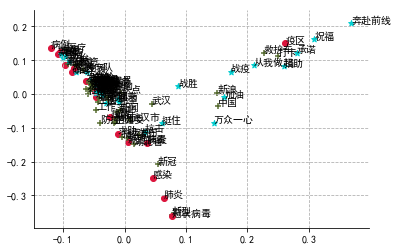

In [16]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
import matplotlib.pyplot as plt
#中文支持matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）
fig = plt.figure()    
tmp=select_df.iloc[:][0].values.tolist()
#添加一个判断词性的脚本然后绘制散点图
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()
# ltext = leg.get_texts()

sens=[]
#
for i in range(len(tmp)):
    sens.append(SnowNLP(tmp[i]).sentiments)
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if sen[i]==2:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='*',label='Positive',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif sen[i]==0:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='o',label='Negative',c=colors2)
    else:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='+',label='Neutral',c=colors3)

 
for i in range(len(tmp)):
    plt.text(X_reduced[i, 0],X_reduced[i, 1], tmp[i])


plt.savefig('瑞士卷.svg',format='svg')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


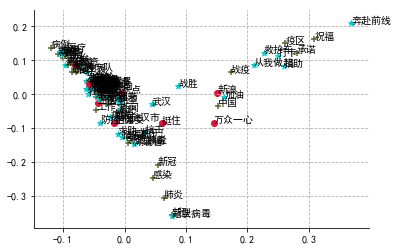

In [22]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
import matplotlib.pyplot as plt
#中文支持matplotlib

plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）
fig = plt.figure()    
tmp=select_df.iloc[:][0].values.tolist()
#添加一个判断词性的脚本然后绘制散点图
plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()
# ltext = leg.get_texts()

sens=[]
#
for i in range(len(tmp)):
    sens.append(SnowNLP(tmp[i]).sentiments)
plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if mod_class[i]==0:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='*',label='Positive',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif mod_class[i]==1:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='o',label='Negative',c=colors2)
    else:
        plt.scatter(X_reduced[i, 0], X_reduced[i, 1], marker='+',label='Neutral',c=colors3)

 
for i in range(len(tmp)):
    plt.text(X_reduced[i, 0],X_reduced[i, 1], tmp[i])


plt.savefig('瑞士卷类别.svg',format='svg')
plt.show()

In [12]:
file2=r'C:\Users\20143\Desktop\100word.csv'
import pandas as pd
sen=pd.read_csv(file2)

In [15]:
len(tmp)

99

In [19]:
sen=sen['sen'].values.tolist()

In [ ]:
sens=[]
#012消极中心积极

手工判断，利用直接提取的直接删除

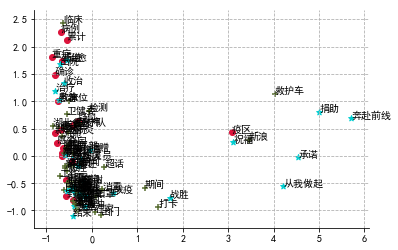

In [20]:
from snownlp import SnowNLP


#blob = SnowNLP(text).sentiments
sens=[]
#
for i in range(len(tmp)):
    sens.append(SnowNLP(tmp[i]).sentiments)


colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if sen[i]==2:
        plt.scatter(newX[i, 0], newX[i, 1], marker='*',label='Positive',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif sen[i]==0:
        plt.scatter(newX[i, 0], newX[i, 1], marker='o',label='Negative',c=colors2)
    else:
        plt.scatter(newX[i, 0], newX[i, 1], marker='+',label='Neutral',c=colors3)

 
for i in range(len(tmp)):
    plt.text(newX[i, 0], newX[i, 1], tmp[i])


plt.savefig('PCA.svg',format='svg')
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


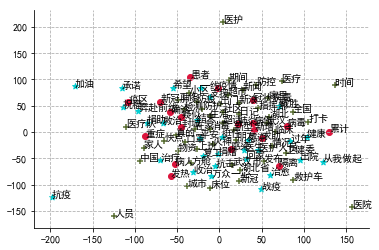

In [23]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
import matplotlib.pyplot as plt

'''降维过程'''
# X = np.array([[10, 56, 12], [80, 21, 92], [21, 30, 53], [11, 81, 15]]) # 数据(4X3)
X=np.array(X,dtype=np.float64)

labels =np.random.randint(0,10,X.shape[0])#范围内的整数 # 每一行数据对应的标签(例如二分类问题)
model = TSNE() 
np.set_printoptions(suppress=True)
Y = model.fit_transform(X) # 将X降维(默认二维)后保存到Y中

'''可视化过程'''
from matplotlib import pyplot as plt

plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if sen[i]==2:
        plt.scatter(Y[i,0],  Y[i,1], marker='*',label='Positive',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif sen[i]==0:
        plt.scatter(Y[i,0],  Y[i,1], marker='o',label='Negative',c=colors2)
    else:
        plt.scatter(Y[i,0],  Y[i,1], marker='+',label='Neutral',c=colors3)

 
# for i in range(len(tmp)):
#     plt.text(newX[i, 0], inewX[i, 1], tmp[i])
    
# plt.scatter(Y[:,0], Y[:,1], 20, labels) # labels为每一行对应标签，20为标记大小
# 
for i in range(len(tmp)):
    plt.text(Y[i,0],  Y[i,1], tmp[i])

plt.savefig("transH2.png") #保存图片

plt.savefig('kankan.svg',format='svg')
plt.show()


In [1]:
file=r'C:\Users\20143\Desktop\数据\top1000.txt'
import pandas as pd
#df=pd.read_csv(r'D:\程序\word2vec\test_18.model.txt',sep=' ',header=None,engine='python')

# coding=utf-8
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

In [17]:
select=['武汉', '疫情', '加油', '肺炎', '冠状病毒', '新型', '新冠肺炎', '封城', '医院','防控', '口罩', '湖北', '武汉市', '确诊', '病例', '打卡', '病毒', '感染', '患者', '隔离', '希望', '抗击','物资', '医护人员', '战疫', '社区', '出门', '在家', '小区', '一线', '湖北省', '新闻', '工作', '新增', '全国', '医生', '求助', '中国', '出院', '方舱','平安', '火神山', '家里', '病人', '防疫', '医疗', '抗疫', '人员', '日记', '发热', '指挥部', '捐赠', '医疗队', '万众一心', '新冠', '重症', '生活', '朋友', '过年', '支援', '挺住', '城市', '复工', '治疗', '回家', '健康', '消毒', '承诺', '疫区', '真的', '防护', '快点', '结束', '奔赴前线', '期间', '疑似', '收治', '卫健委',  '检测', '情况', '上班', '祝福', '从我做起', '战胜', '床位', '救治', '救护车', '家人', '发布', '治愈', '新浪', '时间', '感谢', '超话', '捐助', '火神', '医护', '累计', '超市', '临床']

In [18]:
files=r'C:\Users\20143\Desktop\知识服务\100词语.csv'

In [19]:
data=pd.read_csv(files,engine='python',encoding="utf_8_sig")

In [20]:
data

,Id,Label,timeset,modularity_class
0,武汉,武汉,NaN,0
1,疫情,疫情,NaN,0
2,加油,加油,NaN,0
3,肺炎,肺炎,NaN,2
4,冠状病毒,冠状病毒,NaN,2
...,...,...,...,...
95,火神,火神,NaN,0
96,医护,医护,NaN,0
97,累计,累计,NaN,2
98,超市,超市,NaN,0


In [21]:
mod_class=data['modularity_class'].values.tolist()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


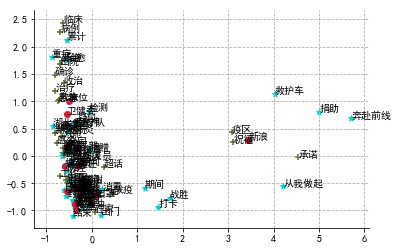

In [34]:
#中文支持matplotlib
import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['SimHei']  # 步骤一（替换sans-serif字体）
plt.rcParams['axes.unicode_minus'] = False  # 步骤二（解决坐标轴负数的负号显示问题）
fig = plt.figure()    
pca = PCA(n_components=2)   #降到2维
pca.fit(X)                  #训练
newX=pca.fit_transform(X)   #降维后的数据
# PCA(copy=True, n_components=2, whiten=False)

#添加一个判断词性的脚本然后绘制散点图

plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()

tmp=select_df.iloc[:][0].values.tolist()

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if mod_class[i]==0:
        plt.scatter(newX[i, 0], newX[i, 1], marker='*',label='Positive',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif mod_class[i]==1:
        plt.scatter(newX[i, 0], newX[i, 1], marker='o',label='Negative',c=colors2)
    else:
        plt.scatter(newX[i, 0], newX[i, 1], marker='+',label='Neutral',c=colors3)

 
for i in range(len(tmp)):
    plt.text(newX[i, 0], newX[i, 1], tmp[i])


plt.savefig('PCA_class.svg',format='svg')
plt.show()

In [39]:
plt.show()

D:\ProgramData\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


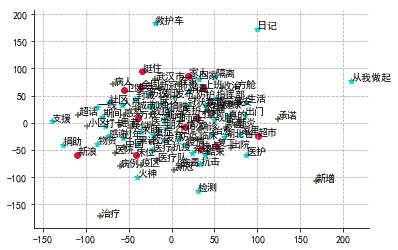

In [41]:
import numpy as np
from sklearn.manifold import TSNE
import matplotlib
matplotlib.rcParams['backend'] = 'SVG'
import matplotlib.pyplot as plt

'''降维过程'''
# X = np.array([[10, 56, 12], [80, 21, 92], [21, 30, 53], [11, 81, 15]]) # 数据(4X3)
X=np.array(X,dtype=np.float64)

labels =np.random.randint(0,10,X.shape[0])#范围内的整数 # 每一行数据对应的标签(例如二分类问题)
model = TSNE() 
np.set_printoptions(suppress=True)
Y = model.fit_transform(X) # 将X降维(默认二维)后保存到Y中

'''可视化过程'''
from matplotlib import pyplot as plt

plt.grid(linestyle="--")  # 设置背景网格线为虚线
ax = plt.gca()
ax.spines['top'].set_visible(False)  # 去掉上边框
ax.spines['right'].set_visible(False)  # 去掉右边框

plt.legend(loc=0, numpoints=1)
leg = plt.gca().get_legend()
plt.legend()
# ltext = leg.get_texts()
# plt.setp(ltext, fontsize=12, fontweight='bold')  # 设置图例字体的大小和粗细

colors1 = '#00CED1' #点的颜色
colors2 = '#DC143C'
colors3='#556B2F'
for i in range(len(tmp)):
    if mod_class[i]==0:
        plt.scatter(Y[i, 0], Y[i, 1], marker='*',c=colors1)
        #plt.scatter(newX[:,0],newX[:,1],label=df.iloc[:][0].values.tolist(),marker='*')
    elif mod_class[i]==1:
        plt.scatter(Y[i, 0], Y[i, 1], marker='o',c=colors2)
    else:
        plt.scatter(Y[i, 0], Y[i, 1], marker='+',c=colors3)

 
for i in range(len(tmp)):
    plt.text(Y[i,0],  Y[i,1], tmp[i])

plt.savefig("transH2_class.png") #保存图片

plt.savefig('kankan_class.svg',format='svg')
plt.show()

In [1]:
import pandas as pd
df=pd.read_csv(r'C:\Users\20143\Documents\Tencent Files\3152983713\FileRecv\武汉各个区.csv',sep=',', quotechar='"', error_bad_lines=False)

In [3]:
# 洪山 10 
# 江岸 18
# 青山 19
# 江汉 20
# 硚口 21
# 汉阳 22
# 武昌 23

In [5]:
a=df['area_code'].values.tolist()

In [6]:
set(a)

{10, 18, 19, 20, 21, 22, 23}

In [8]:
tmp=df.groupby(df['area_code'])

In [9]:
tmp.mean()

,OBJECTID,comment,confidence,lat,lng,negative,positive,repost,sentiment,thumb,Shape_Leng
area_code,,,,,,,,,,,
10,2819.417089,7.589428,0.810246,30.522639,114.362944,0.338847,0.659705,3.964518,1.354815,0.0,2.931270
18,4964.369586,8.415019,0.819218,30.601867,114.297522,0.333945,0.663466,3.351695,1.352401,0.0,0.444661
19,3568.492537,24.395522,0.798699,30.633583,114.389002,0.421810,0.578190,2.074627,1.171642,0.0,0.721321
20,2875.578869,29.590774,0.805418,30.607616,114.260007,0.291217,0.705807,28.627976,1.468750,0.0,0.308719
21,3444.371429,10.563265,0.806245,30.586561,114.229989,0.333180,0.666820,0.538776,1.346939,0.0,0.410438
22,3095.041667,8.872222,0.810747,30.545453,114.226917,0.344302,0.652920,3.338889,1.338889,0.0,0.529380
23,2912.445344,7.433198,0.826066,30.555629,114.336339,0.298297,0.699679,1.252024,1.432186,0.0,0.918169


In [ ]:
negative,repost,comment,all_num

In [13]:
df['count']=1

In [14]:
tmp=df.groupby(df['area_code'])
tmp.count()

,OBJECTID,area,comment,confidence,lat,list,lng,name,negative,positive,...,sentiment,thumb,time,txt,uid_0,uid_1,userarea,Shape_Leng,area_code,count
area_code,,,,,,,,,,,,,,,,,,,,,
10,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381,...,1381,1381,1381,1381,1381,1381,1381,1381,1381,1381
18,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248,...,4248,4248,4248,4248,4248,4248,4248,4248,4248,4248
19,134,134,134,134,134,134,134,134,134,134,...,134,134,134,134,134,134,134,134,134,134
20,672,672,672,672,672,672,672,672,672,672,...,672,672,672,672,672,672,672,672,672,672
21,245,245,245,245,245,245,245,245,245,245,...,245,245,245,245,245,245,245,245,245,245
22,360,360,360,360,360,360,360,360,360,360,...,360,360,360,360,360,360,360,360,360,360
23,988,988,988,988,988,988,988,988,988,988,...,988,988,988,988,988,988,988,988,988,988


In [ ]:
count

In [ ]:
#武汉 ?? 
# #与？ !
#武汉 O网页链接 ！

In [20]:
def panduan(str_):
    if '!' in str_:
        return False
    if '?' in str_:
        return False
    if '#' in str_:
        return False
    else:
        return True

In [27]:
panduan('武汉 #O网页')武汉

False

In [28]:
df[(df['area']!='武汉 O网页链接')&(df['area']!='武汉')&(panduan(df['area']))].to_csv('1.csv')#flags[(flags['stripes']>=1) | (flags['bars']>=1)]

In [29]:
import pandas as pd
df=pd.read_csv(r'C:\Users\20143\Desktop\wuhan.csv',sep=',', quotechar='"', error_bad_lines=False)

In [83]:
def panduan(str_):
    if '!' in str_:
        return 0
    if '?' in str_:
        return 0
    if '#' in str_:
        return 0
    if '0' in str_:
        return 0
    else:
        return 1

In [40]:
# df['code']=df.apply(panduan(df['area']))
df['code'] = df.apply(lambda x: panduan(x['area']), axis=1)

In [76]:
df[df['code']==1].to_csv('筛选.csv')#flags[(flags['stripes']>=1) | (flags['bars']>=1)]

In [77]:
ss=df[df['code']==1]

In [82]:
#C:\Users\20143
import pandas as pd
df=pd.read_csv(r'C:\Users\20143\Desktop\wuhan.csv',sep=',', quotechar='"', error_bad_lines=False)

In [84]:
df['code'] = df.apply(lambda x: panduan(x['area']), axis=1)
ss=df[df['code']==1]

In [89]:
ss.to_csv(r'C:\Users\20143\Desktop\wuhan去重处理后最终.csv')

In [90]:
tmp=ss.groupby(ss['area_code'])

In [91]:
tmp.count()

,Unnamed: 0,OBJECTID,area,comment,confidence,lat,list,lng,name,negative,...,sentiment,thumb,time,txt,uid_0,uid_1,userarea,Shape_Leng,count,code
area_code,,,,,,,,,,,,,,,,,,,,,
10,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209,...,1209,1209,1209,1209,1209,1209,1209,1209,1209,1209
18,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590,...,1590,1590,1590,1590,1590,1590,1590,1590,1590,1590
19,131,131,131,131,131,131,131,131,131,131,...,131,131,131,131,131,131,131,131,131,131
20,665,665,665,665,665,665,665,665,665,665,...,665,665,665,665,665,665,665,665,665,665
21,244,244,244,244,244,244,244,244,244,244,...,244,244,244,244,244,244,244,244,244,244
22,359,359,359,359,359,359,359,359,359,359,...,359,359,359,359,359,359,359,359,359,359
23,969,969,969,969,969,969,969,969,969,969,...,969,969,969,969,969,969,969,969,969,969


In [92]:
tmp.sum()

,Unnamed: 0,OBJECTID,comment,confidence,lat,lng,negative,positive,repost,sentiment,thumb,Shape_Leng,count,code
area_code,,,,,,,,,,,,,,
10,3428444,3429653,8216,982.110758,36907.433826,138268.777687,378.435290,828.564703,4437,1702,0,3543.905302,1209,1209
18,4721349,4722939,12817,1318.265740,48674.693211,181727.885790,521.805697,1065.194280,2230,2159,0,707.010449,1590,1590
19,463684,463815,3256,104.035936,4012.996043,14984.900037,55.522487,75.477511,278,153,0,94.493004,131,131
20,1903067,1903732,10159,535.228770,20354.196282,75982.819819,194.268753,468.731247,3850,975,0,205.298182,665,665
21,843167,843411,2574,196.567729,7463.091986,27872.159825,81.612150,162.387851,132,328,0,100.146934,244,244
22,1113678,1114037,3194,290.892328,10965.797589,41007.410787,123.938218,234.061775,1202,480,0,190.047582,359,359
23,2819319,2820288,7299,801.497123,29607.549908,110791.773794,292.643075,674.356925,1230,1379,0,889.705874,969,969


In [93]:
tmp.mean()

,Unnamed: 0,OBJECTID,comment,confidence,lat,lng,negative,positive,repost,sentiment,thumb,Shape_Leng,count,code
area_code,,,,,,,,,,,,,,
10,2835.768404,2836.768404,6.795699,0.812333,30.527241,114.366235,0.313015,0.685331,3.669975,1.407775,0.0,2.931270,1.0,1.0
18,2969.401887,2970.401887,8.061006,0.829098,30.613015,114.294268,0.328180,0.669934,1.402516,1.357862,0.0,0.444661,1.0,1.0
19,3539.572519,3540.572519,24.854962,0.794167,30.633558,114.388550,0.423836,0.576164,2.122137,1.167939,0.0,0.721321,1.0,1.0
20,2861.754887,2862.754887,15.276692,0.804855,30.607814,114.259879,0.292133,0.704859,5.789474,1.466165,0.0,0.308719,1.0,1.0
21,3455.602459,3456.602459,10.549180,0.805605,30.586443,114.230163,0.334476,0.665524,0.540984,1.344262,0.0,0.410438,1.0,1.0
22,3102.167131,3103.167131,8.896936,0.810285,30.545397,114.226771,0.345232,0.651983,3.348189,1.337047,0.0,0.529380,1.0,1.0
23,2909.513932,2910.513932,7.532508,0.827138,30.554747,114.336196,0.302005,0.695931,1.269350,1.423117,0.0,0.918169,1.0,1.0


In [94]:
df[df['area_code']==20].to_csv('222.csv')

In [ ]:
# 洪山 10 
# 江岸 18
# 青山 19
# 江汉 20
# 硚口 21
# 汉阳 22
# 武昌 23

In [95]:
tmp.mean()['repost'].values.tolist()

[3.6699751861042182,
 1.4025157232704402,
 2.122137404580153,
 5.7894736842105265,
 0.5409836065573771,
 3.348189415041783,
 1.2693498452012384]

In [96]:
repost=tmp.mean()['repost'].values.tolist()
positive=tmp.mean()['positive'].values.tolist()
negative=tmp.mean()['negative'].values.tolist()
comment=tmp.mean()['comment'].values.tolist()
count=tmp.count()['count'].values.tolist()
pepole=[163.75,96.24,52.88,72.96,86.85,65.27,127.63]

In [97]:
from sklearn.preprocessing import Normalizer
 
scaler=Normalizer()
 
respost=scaler.fit_transform(
        np.array(repost).reshape(1,-1)
        )[0].tolist()
positive=scaler.fit_transform(
        np.array(positive).reshape(1,-1)
        )[0].tolist()
negative=scaler.fit_transform(
        np.array(negative).reshape(1,-1)
        )[0].tolist()
comment=scaler.fit_transform(
        np.array(comment).reshape(1,-1)
        )[0].tolist()
count=scaler.fit_transform(
        np.array(count).reshape(1,-1)
        )[0].tolist()
pepole=scaler.fit_transform(
        np.array(pepole).reshape(1,-1)
        )[0].tolist()

D:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:429: DataConversionWarning: Data with input dtype int32 was converted to float64 by the normalize function.
  warnings.warn(msg, _DataConversionWarning)


In [ ]:
# 洪山 10 
# 江岸 18
# 青山 19
# 江汉 20
# 硚口 21
# 汉阳 22
# 武昌 23

In [103]:
positive=tmp.mean()['positive'].values.tolist()
negative=tmp.mean()['negative'].values.tolist()

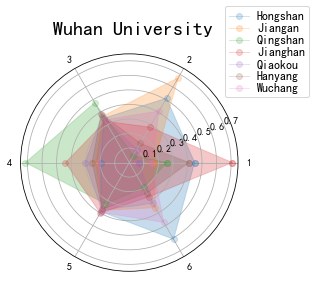

In [107]:
#HollandRadarDraw.py
from numpy import array,shape,arange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
matplotlib.rcParams['font.family']='SimHei'
radar_labels = np.array(['1','2','3',\
                         '4','5','6']) #雷达标签
nAttr = 6
data = np.array([respost,
                 count,
                
                 negative,
                 comment,
                  positive,
                 pepole]) #数据值
data_labels = ('Hongshan','Jiangan','Qingshan',\
                         'Jianghan','Qiaokou','Hanyang','Wuchang')
angles = np.linspace(0, 2*np.pi, nAttr, endpoint=False)
data = np.concatenate((data, [data[0]]))
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure(facecolor="white")
plt.subplot(111, polar=True)
plt.plot(angles,data,'o-', linewidth=1, alpha=0.2)
plt.fill(angles,data, alpha=0.25)
plt.thetagrids(angles*180/np.pi, radar_labels)
plt.figtext(0.52, 0.95, 'Wuhan University', ha='center', size=20)
legend = plt.legend(data_labels, loc=(0.94, 0.80), labelspacing=0.1)
plt.setp(legend.get_texts(), fontsize='large')
plt.grid(True)
plt.savefig('holland_radar.jpg')
plt.savefig('holland_radar.svg',format='svg')
plt.show()

In [112]:
# repost=tmp.mean()['repost'].values.tolist()
positive=tmp.mean()['positive'].values.tolist()
negative=tmp.mean()['negative'].values.tolist()


In [ ]:
# positive,

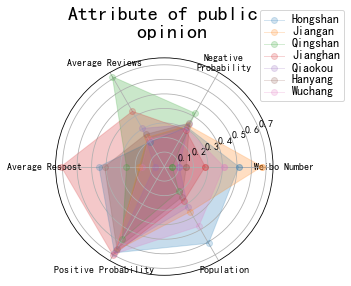

In [121]:
#HollandRadarDraw.py
from numpy import array,shape,arange
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
# matplotlib.rcParams['font.family']='SimHei'
radar_labels = np.array(['Weibo Number','Negative\nProbability','Average Reviews',\
                         'Average Respost','Positive Probability','Population']) #雷达标签
nAttr = 6
data = np.array([count,
                 negative,
                 
                 comment,
    respost,
                 positive,
                 
                 pepole]) #数据值
data_labels = ('Hongshan','Jiangan','Qingshan',\
                         'Jianghan','Qiaokou','Hanyang','Wuchang')
angles = np.linspace(0, 2*np.pi, nAttr, endpoint=False)
data = np.concatenate((data, [data[0]]))
angles = np.concatenate((angles, [angles[0]]))
fig = plt.figure(facecolor="white")
plt.subplot(111, polar=True)
plt.plot(angles,data,'o-', linewidth=1, alpha=0.2)
plt.fill(angles,data, alpha=0.25)
plt.thetagrids(angles*180/np.pi, radar_labels)
plt.figtext(0.52, 0.95, 'Attribute of public \n opinion', ha='center', size=20)
legend = plt.legend(data_labels, loc=(0.94, 0.80), labelspacing=0.1)
plt.setp(legend.get_texts(), fontsize='large')
plt.grid(True)
plt.savefig('holland_radar.jpg')
plt.savefig('holland_radar.svg',format='svg')
plt.show()

In [98]:
respost

[0.44979940136733493,
 0.17189509485620924,
 0.26009334826392916,
 0.7095693200460467,
 0.06630401843053224,
 0.41036070223377097,
 0.15557402204218135]

In [99]:
positive

[0.38926651819351105,
 0.38052099543431944,
 0.3272602057353956,
 0.4003586199711058,
 0.3780163897306834,
 0.370324946492369,
 0.39528739684492586]

In [2]:
print('张苗苗 hello world')

张苗苗 hello world
